In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast


In [2]:
#Ruta figures por capitulo
results_path = "/home/andres/Dropbox/Manuscrito_Thesis/Tesis_Andrés_López/figures/results/"

In [3]:
# leer archivo
with open("results/halos_history2.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    parts = line.strip().split("], [")
    ids = ast.literal_eval(parts[0] + "]")
    snaps = ast.literal_eval("[" + parts[1])
    
    # emparejar id con su snap
    for halo_id, snap in zip(ids, snaps):
        rows.append({"halo_id": halo_id, "snap": snap})

# convertir a DataFrame
history = pd.DataFrame(rows)

history.head(10)


,halo_id,snap
0,0,99
1,0,67
2,0,50
3,1,40
4,2,33
5,1,25
6,2,21
7,1,99
8,1,67
9,3,50


In [4]:
#buscar el halo con id 114088 en z=0
history[(history['halo_id']==114088) & (history['snap']==50)]

,halo_id,snap


In [5]:
history.tail(11)

,halo_id,snap
760973,132392,67
760974,161545,50
760975,552980,40
760976,891775,33
760977,110881,99
760978,129876,67
760979,243731,50
760980,286155,40
760981,313510,33
760982,378168,25


In [6]:
halo2_z1_V2 = pd.read_csv('../../results/Halo_Catalog.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])

/tmp/ipykernel_83667/3048400556.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  halo2_z1_V2 = pd.read_csv('../../results/Halo_Catalog.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])


In [7]:
halo2_z0 = pd.read_csv('../../results/Halos_50_2_z0.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z0d5 = pd.read_csv('../../results/Halos_50_2_z0d5.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z1 = pd.read_csv('../../results/Halos_50_2_z1.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z1d5 = pd.read_csv('../../results/Halos_50_2_z1d5.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z2 = pd.read_csv('../../results/Halos_50_2_z2.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z3 = pd.read_csv('../../results/Halos_50_2_z3.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo2_z4 = pd.read_csv('../../results/Halos_50_2_z4.dat',sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])

#quitar de halo4_z0 las filas donde Mdom es 0

# halo2_z0 = halo2_z0[halo2_z0['Mdom'] > 0]
# halo2_z0d5 = halo2_z0d5[halo2_z0d5['Mdom'] > 0]
# halo2_z1 = halo2_z1[halo2_z1['Mdom'] > 0]
# halo2_z1d5 = halo2_z1d5[halo2_z1d5['Mdom'] > 0]
# halo2_z2 = halo2_z2[halo2_z2['Mdom'] > 0]
# halo2_z3 = halo2_z3[halo2_z3['Mdom'] > 0]
# halo2_z4 = halo2_z4[halo2_z4['Mdom'] > 0]

In [8]:
#ver en que indices Mdom es distinto para halo2_z1_V2 con halo2_z1
indices_diff = halo2_z1_V2.index[halo2_z1_V2['Mdom'] != halo2_z1['Mdom']]
indices_diff

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1020029, 1020053, 1020065, 1020071, 1020077, 1020103, 1020120, 1020262,
       1020281, 1020310],
      dtype='int64', length=16995)

In [9]:
#ver en que indices Mdom es igual para halo2_z1_V2 con halo2_z1
indices_equal = halo2_z1_V2.index[halo2_z1_V2['Mdom'] == halo2_z1['Mdom']]
indices_equal

Index([     26,      34,      39,      45,      48,      49,      50,      54,
            57,      59,
       ...
       1020416, 1020417, 1020418, 1020419, 1020420, 1020421, 1020422, 1020423,
       1020424, 1020425],
      dtype='int64', length=1003431)

In [17]:
halo2_z0.head()

,X,Y,Z,Mvir,Rvir,Mdom,Npart
0,7296.923340,24568.171875,21312.650391,15095.435547,1082.628174,12440.345777,42632469
1,23691.609375,15117.791992,3144.812988,7451.421387,855.576904,4486.701472,15375711
2,27096.421875,7563.724609,4061.914795,5196.799316,758.742126,3289.364629,11272495
3,15541.906250,29371.767578,26002.240234,3474.905273,663.502197,2612.853859,8954125
4,20937.494141,5179.744629,31063.029297,3279.320801,650.796753,2294.943374,7864661


In [18]:
halos = [halo2_z0, halo2_z0d5, halo2_z1, halo2_z1d5, halo2_z2, halo2_z3, halo2_z4]

len(halo2_z0),len(halo2_z0d5),len(halo2_z1),len(halo2_z1d5),len(halo2_z2),len(halo2_z3),len(halo2_z4)

(846050, 947314, 1020426, 1079988, 1118744, 1142042, 1098094)

In [19]:
history.head(7)

,halo_id,snap
0,0,99
1,0,67
2,0,50
3,1,40
4,2,33
5,1,25
6,2,21


In [20]:
# función para convertir snap a z
def snap2z(snap):
    if snap == 99:
        return 0
    if snap == 67:
        return 0.5
    if snap == 50:
        return 1
    if snap == 40:
        return 1.5
    if snap == 33:
        return 2
    if snap == 25:
        return 3.01
    if snap == 21:
        return 4.01

In [21]:
def epoch(z):
    if z == 0:
        return 0
    if z == 0.5:
        return 1
    if z == 1:
        return 2
    if z == 1.5:
        return 3
    if z == 2:
        return 4
    if z == 3.01:
        return 5
    if z == 4.01:
        return 6 

In [22]:
history['z'] = history['snap'].apply(snap2z)
history['epoch'] = history['z'].apply(epoch)

In [23]:
history.head(7)

,halo_id,snap,z,epoch
0,0,99,0.00,0
1,0,67,0.50,1
2,0,50,1.00,2
3,1,40,1.50,3
4,2,33,2.00,4
5,1,25,3.01,5
6,2,21,4.01,6


In [24]:
len(history)

760984

In [25]:
Mdomains = []
Mvirs = []
Rvirs = []

for i, snap in enumerate(history['snap']):
    id = int(history['halo_id'].iloc[i])

    #to get [halo3_z0, halo3_z0d5, halo3_z1, halo3_z1d5, halo3_z2, halo3_z3, halo3_z4] at some z
    epochs = history['epoch'].iloc[i]
    Halo = halos[epochs]

    mdom = Halo.iloc[id]['Mdom'] 
    mvir = Halo.iloc[id]['Mvir']
    rvir = Halo.iloc[id]['Rvir']

    Mdomains.append(mdom)
    Mvirs.append(mvir)
    Rvirs.append(rvir)

history['Mdom'] = Mdomains
history['Mvir'] = Mvirs
history['Rvir'] = Rvirs


In [26]:
len(Mdomains)

760984

In [ ]:
history.head(12)

,halo_id,snap,z,epoch,Mdom,Mvir,Rvir
0,0,99,0.00,0,12440.345777,15095.435547,1082.628174
1,0,67,0.50,1,9583.512727,7351.824219,961.341614
2,0,50,1.00,2,3952.028109,3477.991455,782.610474
3,1,40,1.50,3,3295.419864,2304.820068,695.626465
4,2,33,2.00,4,2152.375580,1340.657471,586.263428
5,1,25,3.01,5,1331.137079,441.350494,408.041748
6,2,21,4.01,6,821.903232,196.342697,312.413055
7,1,99,0.00,0,4486.701472,7451.421387,855.576904
8,1,67,0.50,1,4043.950900,4386.431152,809.344177
9,3,50,1.00,2,3420.440579,2622.072021,712.264526


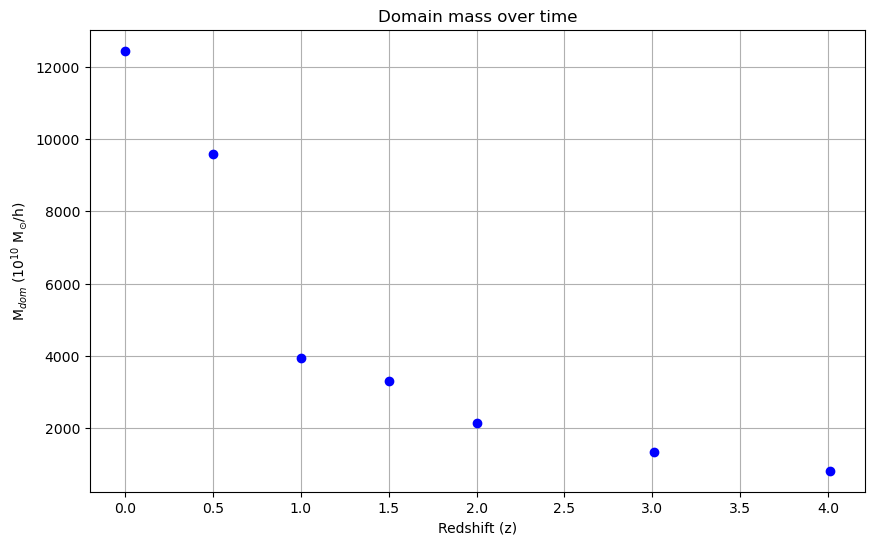

In [27]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:7]['z'], history.iloc[0:7]['Mdom'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{dom}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

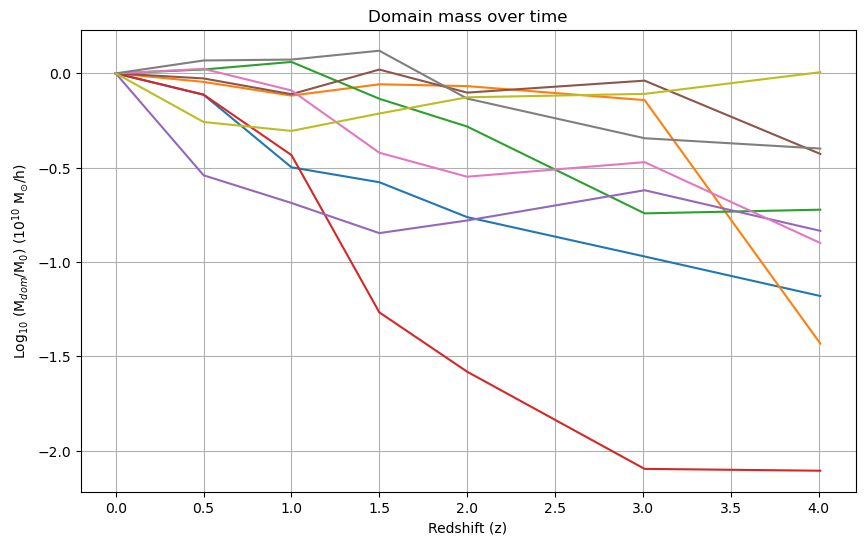

In [28]:
fig = plt.figure(figsize=(10, 6))
i = 0
zs = [0, 0.5, 1, 1.5, 2, 3.01, 4.01, 5.01]
hal = []
zsgraph = []

k = 0
while i < 70:

    if history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mdom']
        hal.append(np.log10(history.iloc[i]['Mdom']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{dom}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

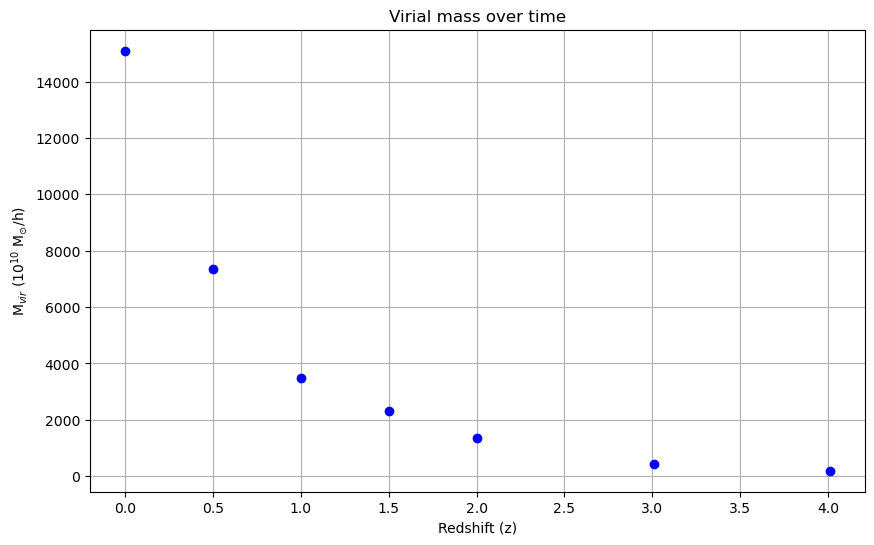

In [29]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:7]['z'], history.iloc[0:7]['Mvir'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{vir}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

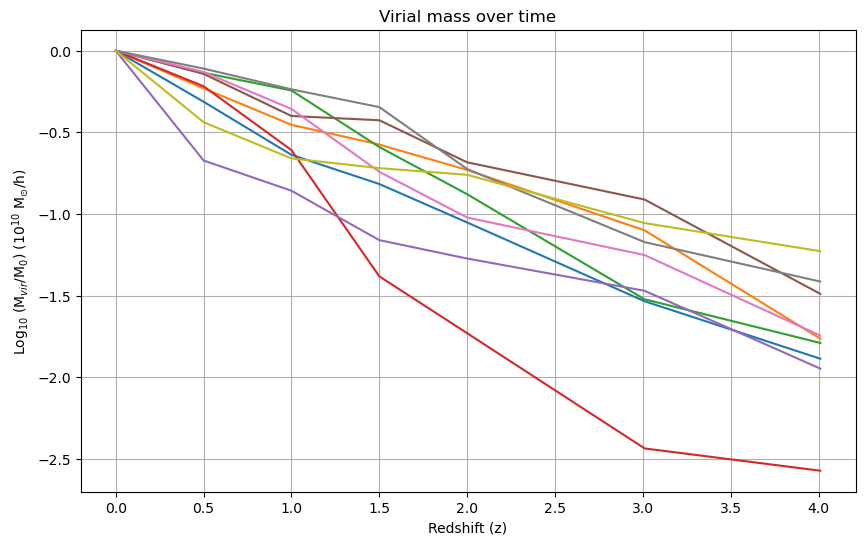

In [30]:
fig = plt.figure(figsize=(10, 6))
i = 0
zs = [0, 0.5, 1, 1.5, 2, 3.01, 4.01, 5.01]
hal = []
zsgraph = []

k = 0
while i < 70:

    if history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mvir']
        hal.append(np.log10(history.iloc[i]['Mvir']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{vir}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

In [31]:
#escribir un archivo csv con el dataframe history
history.to_csv('../../results/halos2_history.csv', index=False)